In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN

In [2]:
df= pd.read_csv('dataset.csv')
df = df.drop('index', axis=1)
df.columns = df.columns.str.lower()

In [8]:
df.shape

(5956842, 23)

In [17]:
df.columns

Index(['ph', 'iron', 'nitrate', 'chloride', 'lead', 'zinc', 'color',
       'turbidity', 'fluoride', 'copper', 'odor', 'sulfate', 'conductivity',
       'chlorine', 'manganese', 'total dissolved solids', 'source',
       'water temperature', 'air temperature', 'month', 'day', 'time of day',
       'target'],
      dtype='object')

In [27]:
string_columns = df.select_dtypes(include=['object'])
print(string_columns.columns.tolist())

['color', 'source', 'month']


In [7]:
colour_mapping = {
    'Colorless': 1,
    'Faint Yellow': 3,
    'Light Yellow': 4,
    'Near Colorless': 2,
    'Yellow': 5,
    np.nan: np.nan
}

source_mapping = {
    np.nan: np.nan,
    'Lake': 8,
    'River': 7,
    'Ground': 2,
    'Spring': 5,
    'Stream': 1,
    'Aquifer': 3,
    'Reservoir': 4,
    'Well': 6
}

month_mapping = {
    'January': 3,
    'November': 11,
    'April': 8,
    'June': 9,
    'March': 1,
    'September': 10,
    'May': 5,
    'July': 2,
    'August': 4,
    'October': 7,
    'December': 6,
    'February': 12,
    np.nan: np.nan
}

df['color'] = df['color'].replace(colour_mapping)
df['color'] = df['color'].astype('Int64')

df['source'] = df['source'].replace(source_mapping)
df['source'] = df2['source'].astype('Int64')

df['month'] = df['month'].replace(month_mapping)
df['month'] = df['month'].astype('Int64')

In [29]:
df.head()

,index,ph,iron,nitrate,chloride,lead,zinc,color,turbidity,fluoride,...,chlorine,manganese,total dissolved solids,source,water temperature,air temperature,month,day,time of day,target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


### Source,color,month,day,time are categorical values

### Calculating Nan values of each feature

In [28]:
nan_percentage = (df.isna().mean() * 100).round(2)
for column, percentage in nan_percentage.items():
    print(f"Percentage of NaN values in '{column}': {percentage}%")

Percentage of NaN values in 'index': 0.0%
Percentage of NaN values in 'ph': 1.95%
Percentage of NaN values in 'iron': 0.67%
Percentage of NaN values in 'nitrate': 1.77%
Percentage of NaN values in 'chloride': 2.95%
Percentage of NaN values in 'lead': 0.45%
Percentage of NaN values in 'zinc': 2.62%
Percentage of NaN values in 'color': 0.1%
Percentage of NaN values in 'turbidity': 0.84%
Percentage of NaN values in 'fluoride': 3.18%
Percentage of NaN values in 'copper': 3.35%
Percentage of NaN values in 'odor': 3.0%
Percentage of NaN values in 'sulfate': 3.31%
Percentage of NaN values in 'conductivity': 2.75%
Percentage of NaN values in 'chlorine': 0.97%
Percentage of NaN values in 'manganese': 1.84%
Percentage of NaN values in 'total dissolved solids': 0.03%
Percentage of NaN values in 'source': 1.48%
Percentage of NaN values in 'water temperature': 2.82%
Percentage of NaN values in 'air temperature': 0.5%
Percentage of NaN values in 'month': 1.61%
Percentage of NaN values in 'day': 1.67

### NaN values are present in each feature ranging from 1-3%

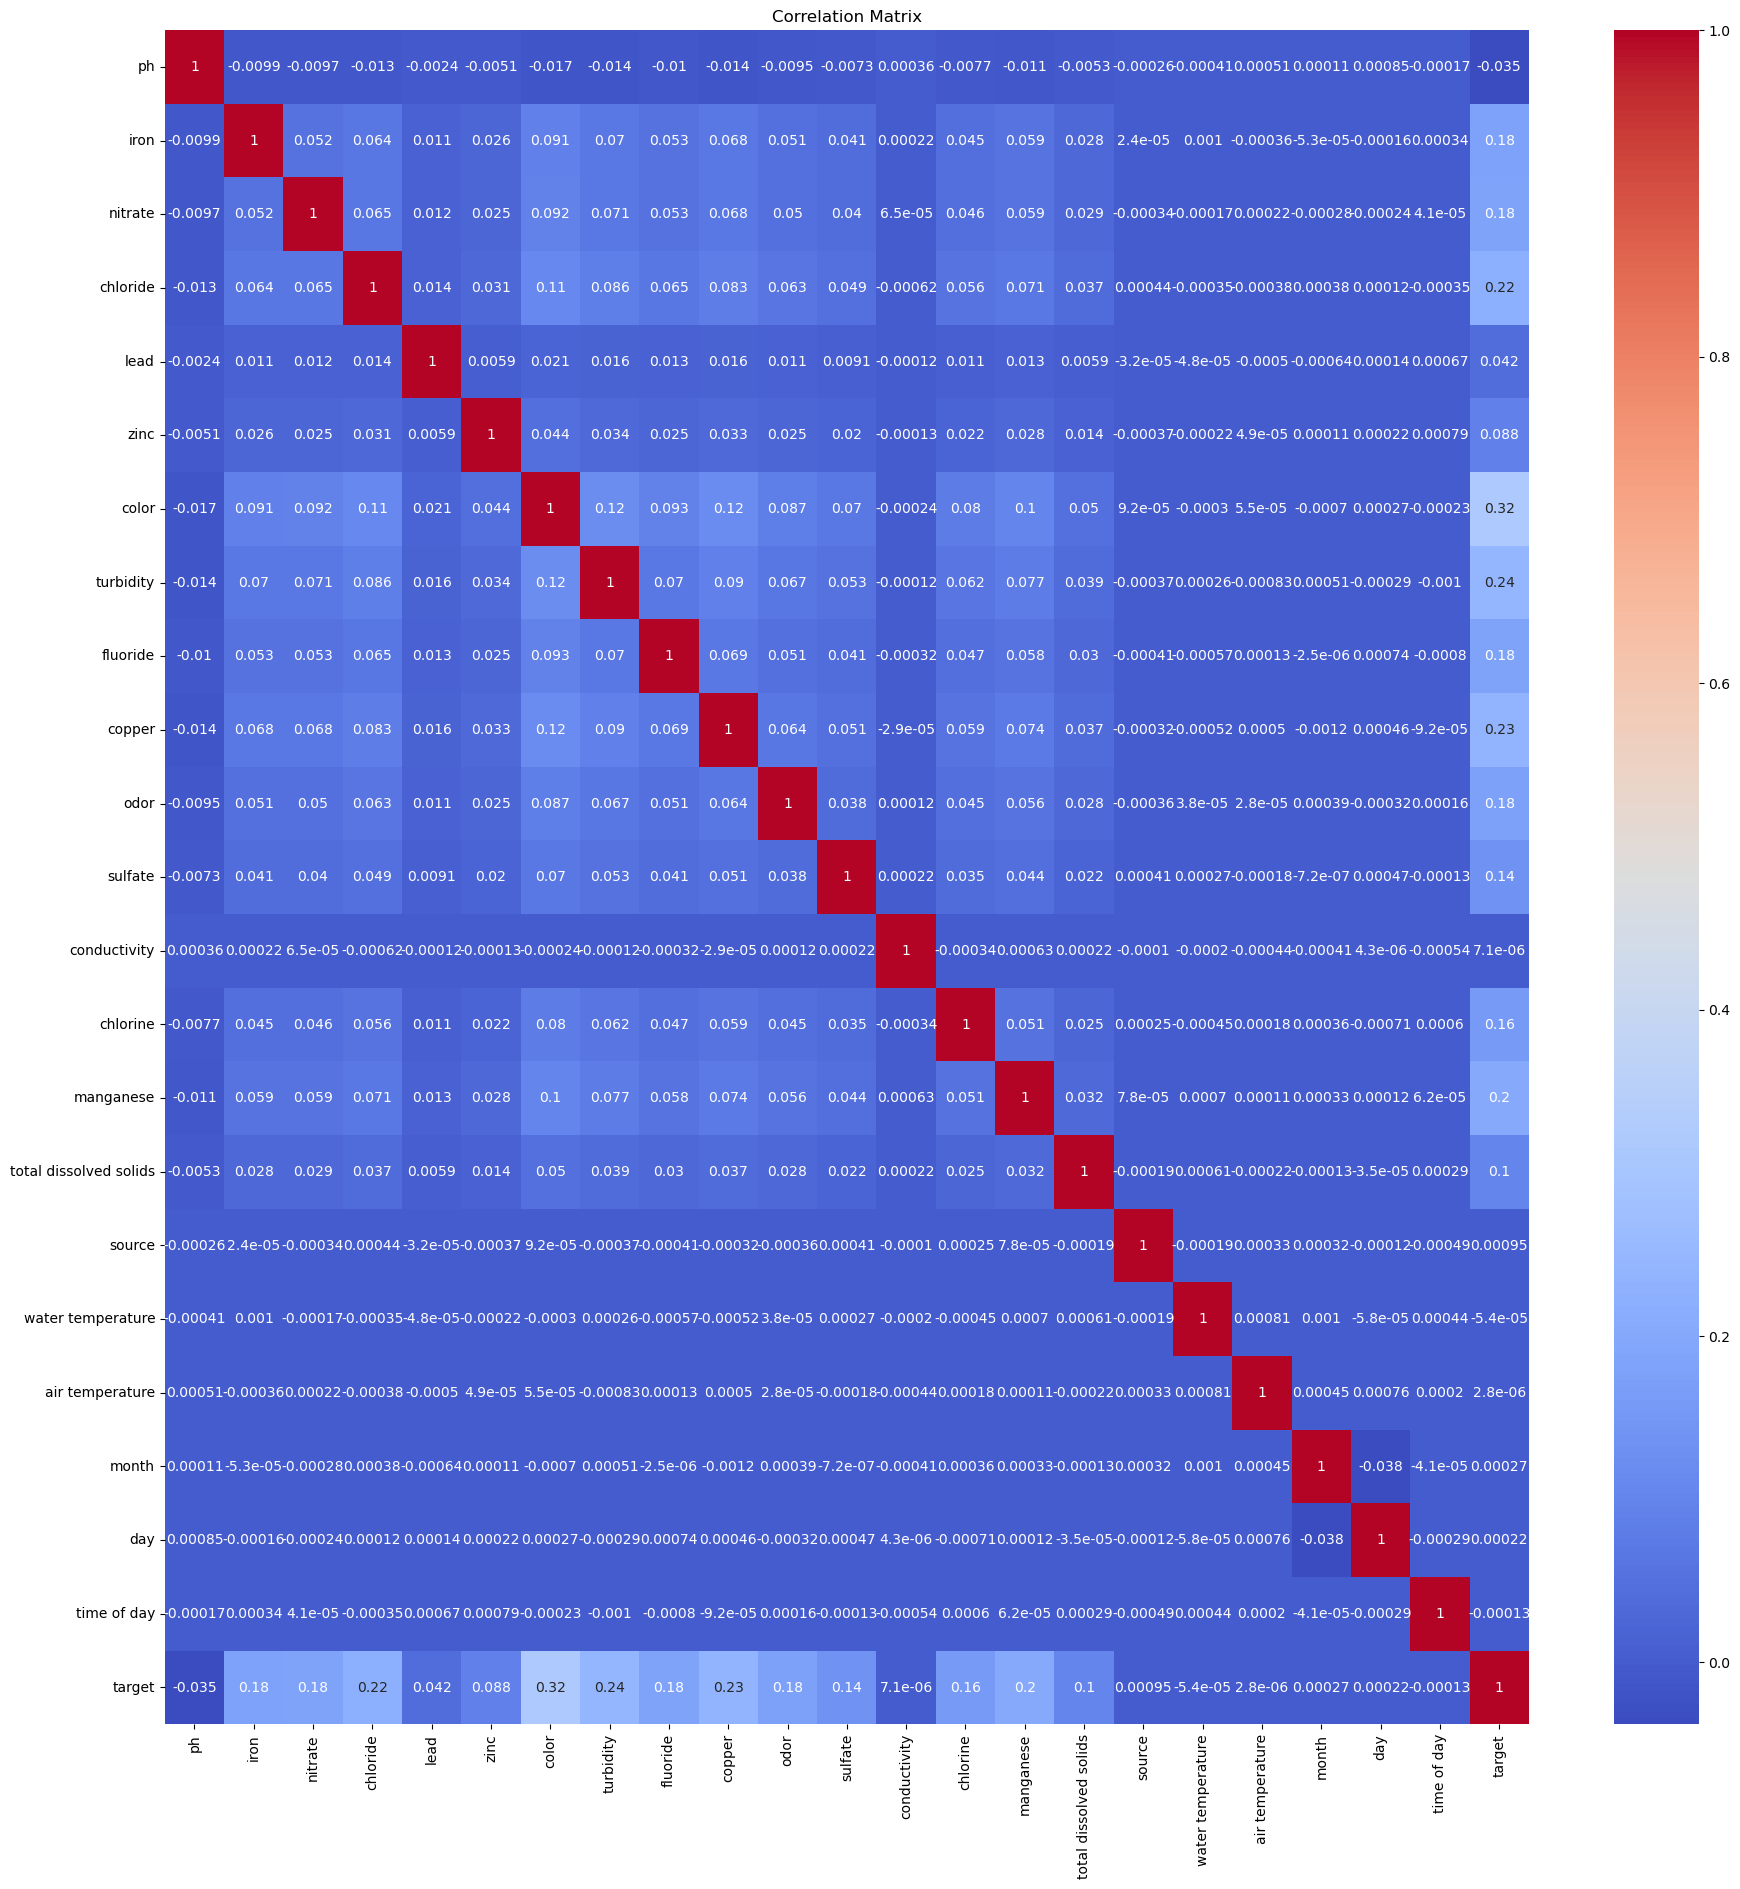

In [19]:
correlation_matrix = df.corr()

plt.figure(figsize=(22, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### The above heatmap shows relation between each feature, the most important being relation of each feature with the target column

## Plotting histogram for each feature in the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

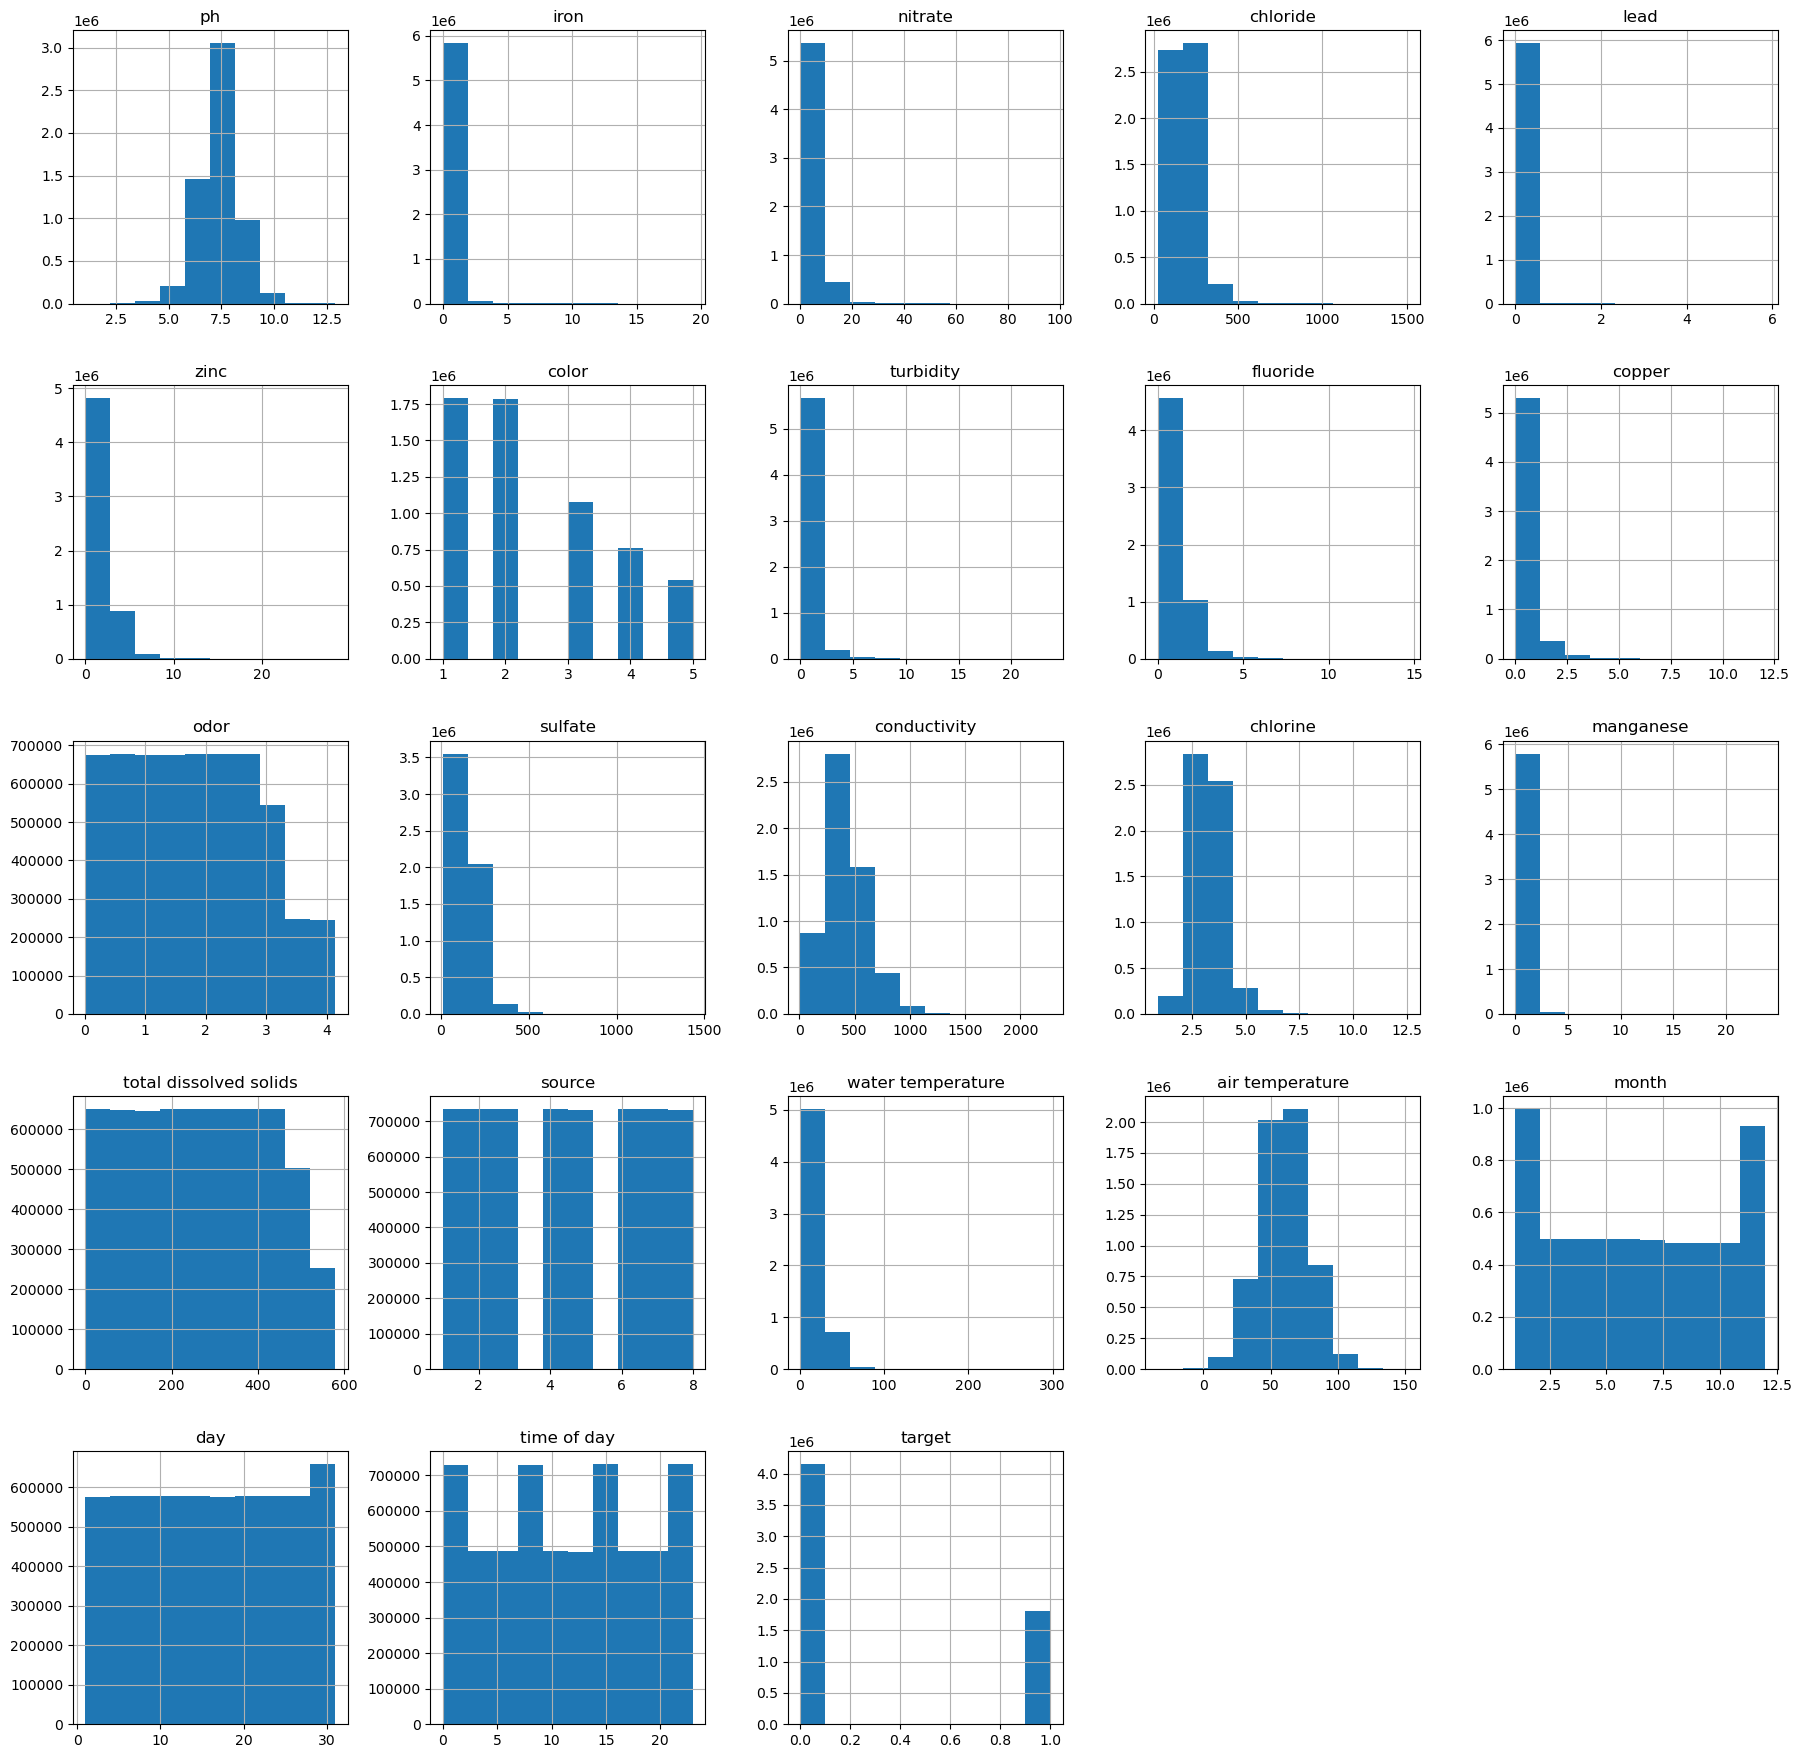

In [20]:
df.hist(figsize=(22,22))
plt.show

### filled nan values on the basis of histogram above

In [36]:
columns_to_fill_mean = ['iron', 'lead', 'turbidity', 'fluoride', 'manganese']
for column in columns_to_fill_mean:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)
    
columns_to_fill_median = ['nitrate', 'chloride', 'zinc', 'copper', 'odor', 'chlorine', 'total dissolved solids','water temperature', 'ph', 'conductivity']
for column in columns_to_fill_median:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)


In [ ]:
df.dropna(subset=['color'], inplace=True)

### Dropped the values of color because it has only about 5000 nan values

### Dropping columns based on the correlation matrix to focus on more important features

In [44]:
cols_drop = ['month','day','time of day','conductivity','air temperature','source']
df=df.drop(cols_drop,axis=1)

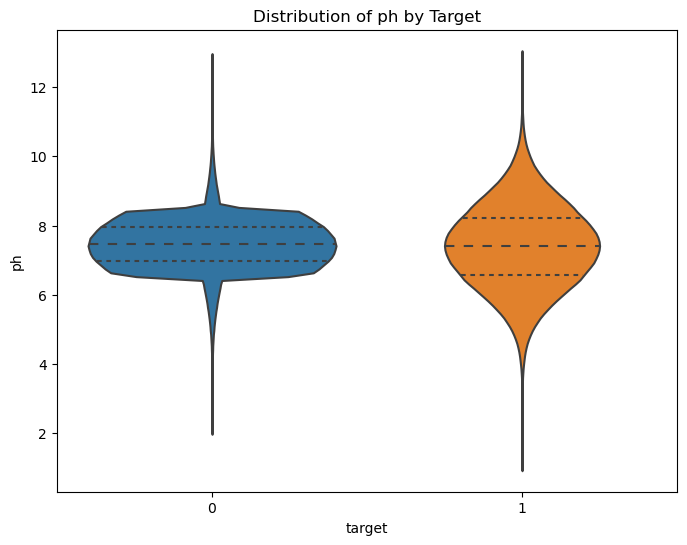

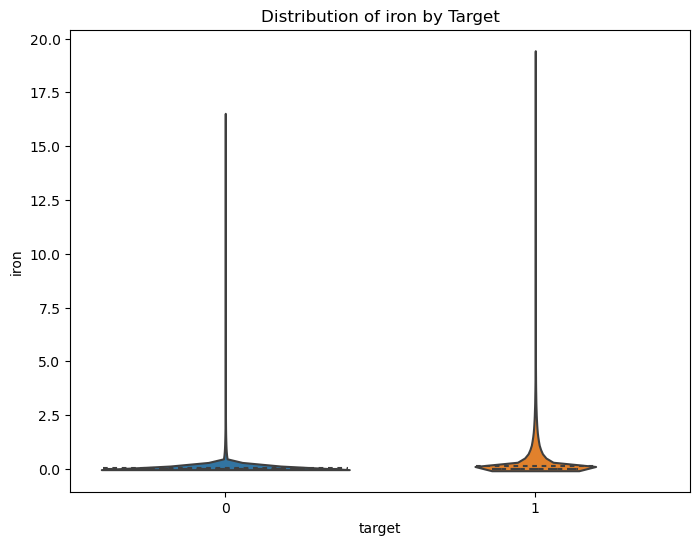

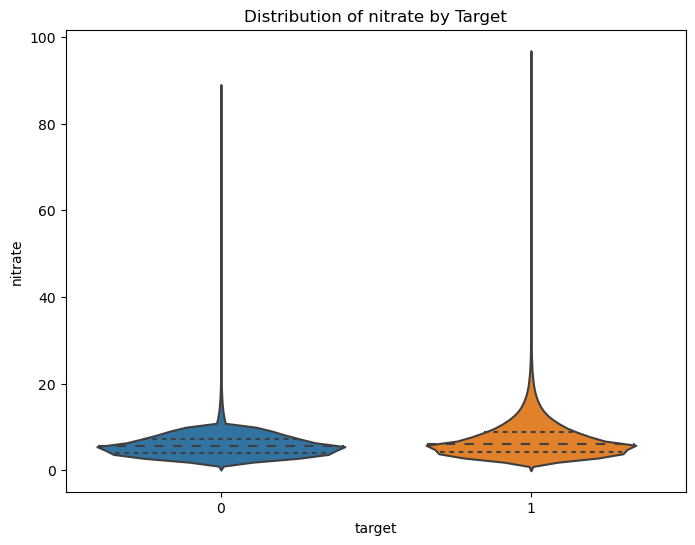

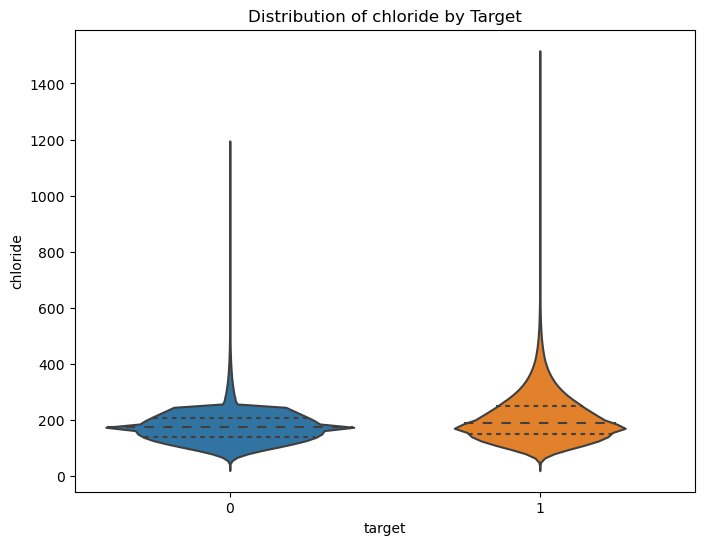

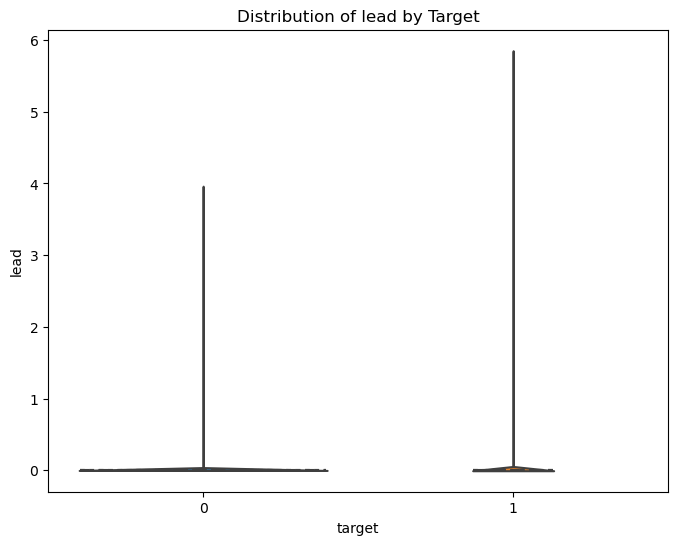

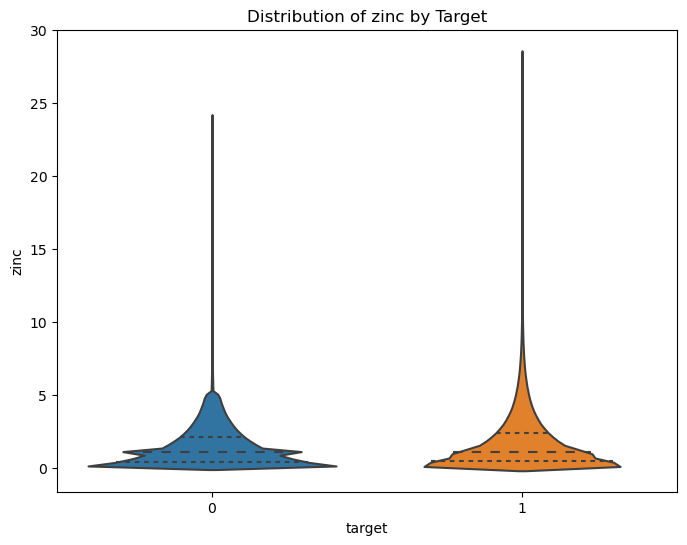

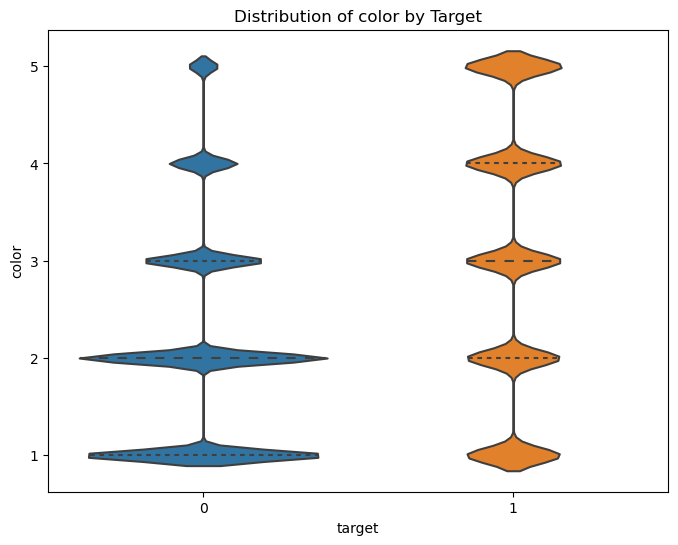

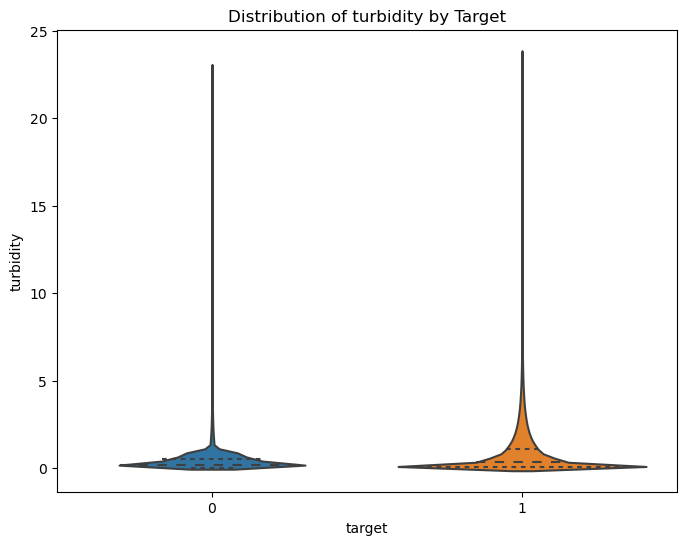

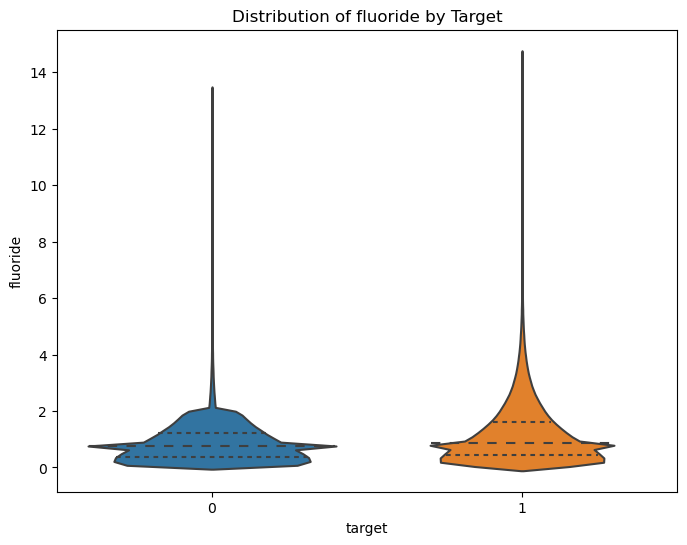

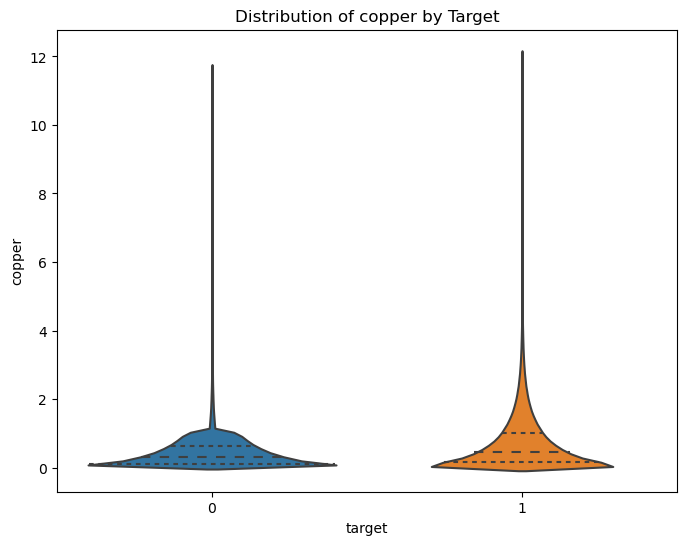

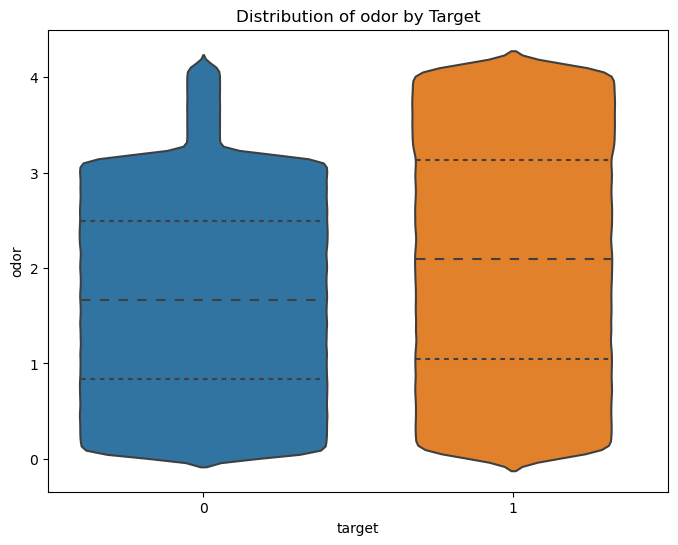

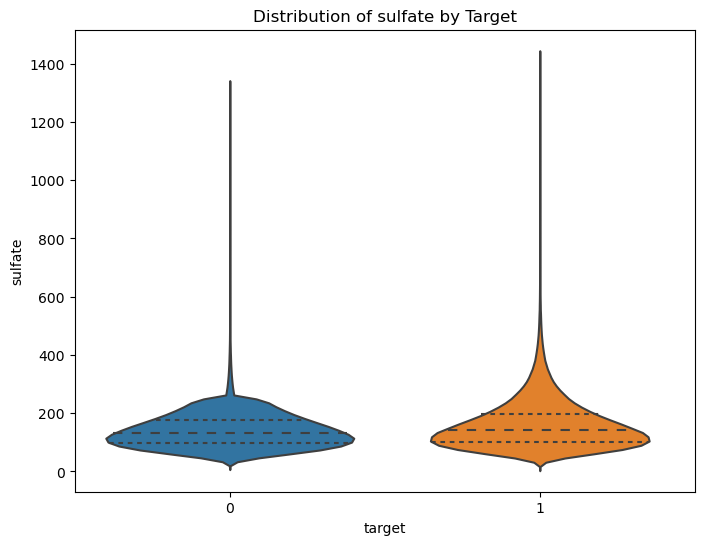

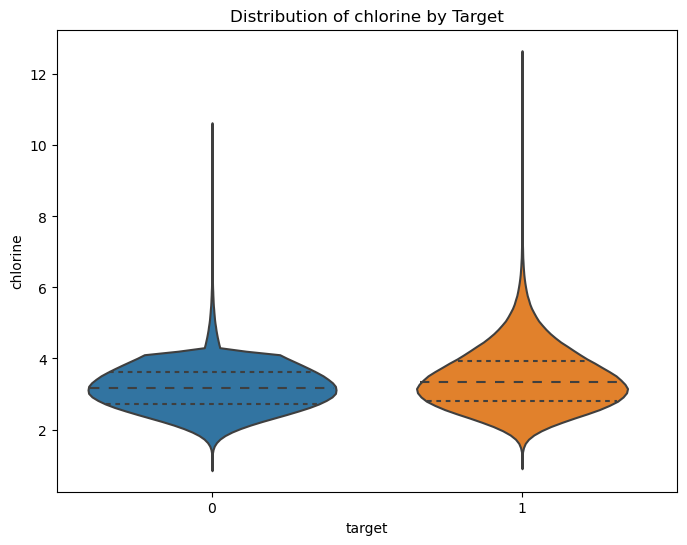

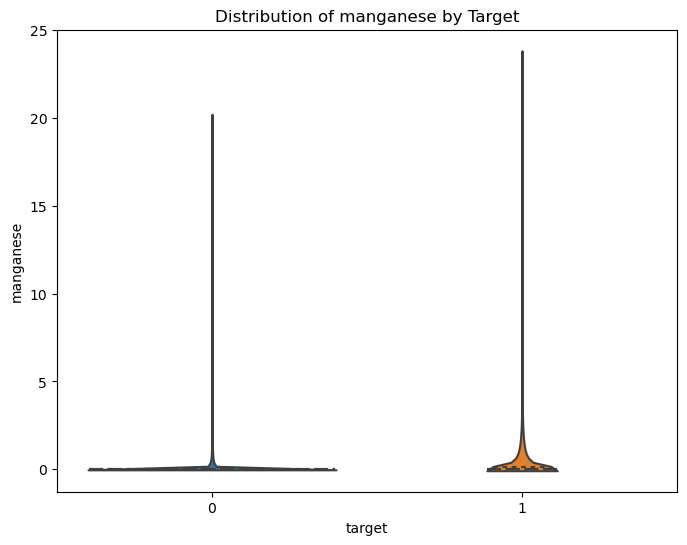

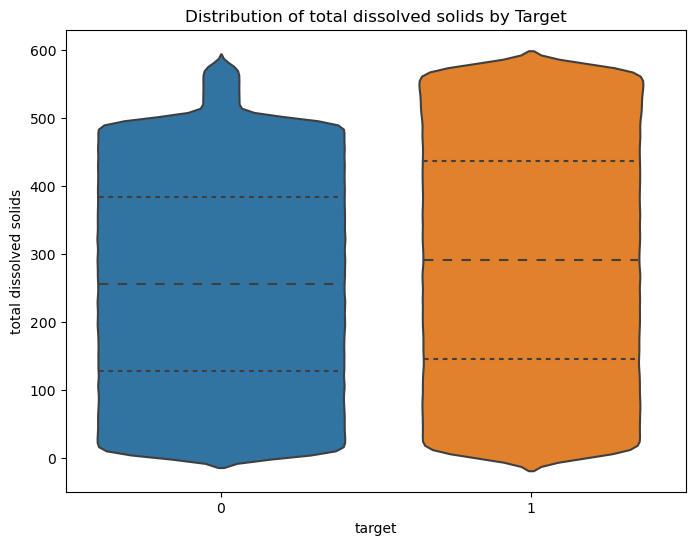

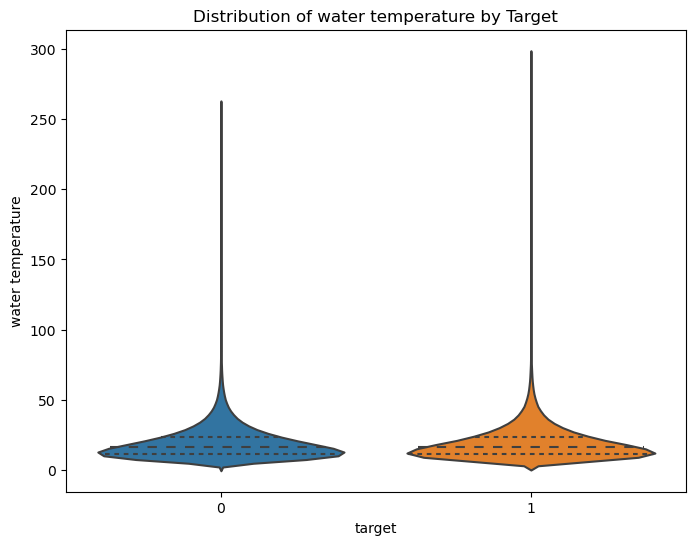

In [46]:
for feature_column in df.columns[:-1]: 
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='target', y=feature_column, data=df, inner='quartile')
    plt.title(f'Distribution of {feature_column} by Target')
    plt.show()

### Plotted violin plots to show relation between values of target column vs the features of the dataset

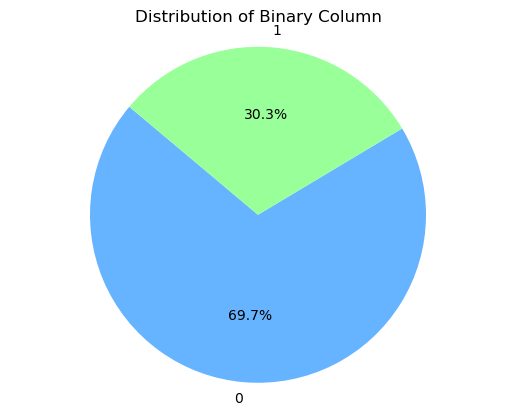

In [48]:
binary_counts = df['target'].value_counts()

labels = binary_counts.index
sizes = binary_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.axis('equal')

plt.title('Distribution of Target Column')
plt.show()

### The target column is quite unbalance so will attempt to balance it using ADASYN

## Applying ADASYN

In [ ]:
x = df.drop(columns=["target"])
y = df["target"]

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(x, y)

df = pd.DataFrame(data=X_resampled, columns=x.columns)
df['target'] = y_resampled

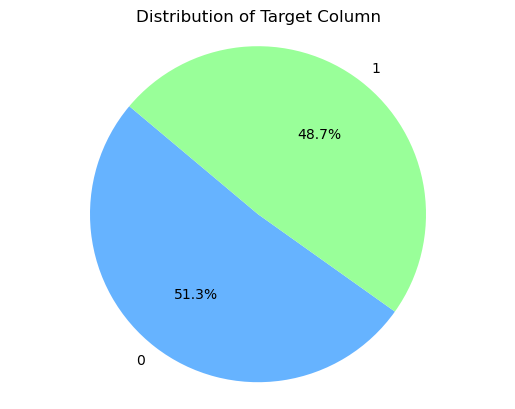

In [7]:
binary_counts = df['target'].value_counts()

labels = binary_counts.index
sizes = binary_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.axis('equal')

plt.title('Distribution of Target Column')
plt.show()

In [6]:
df.shape

(8089744, 18)

### Dataset balanced using ADASYN

## Plotting the scattered graph to identifying outliers

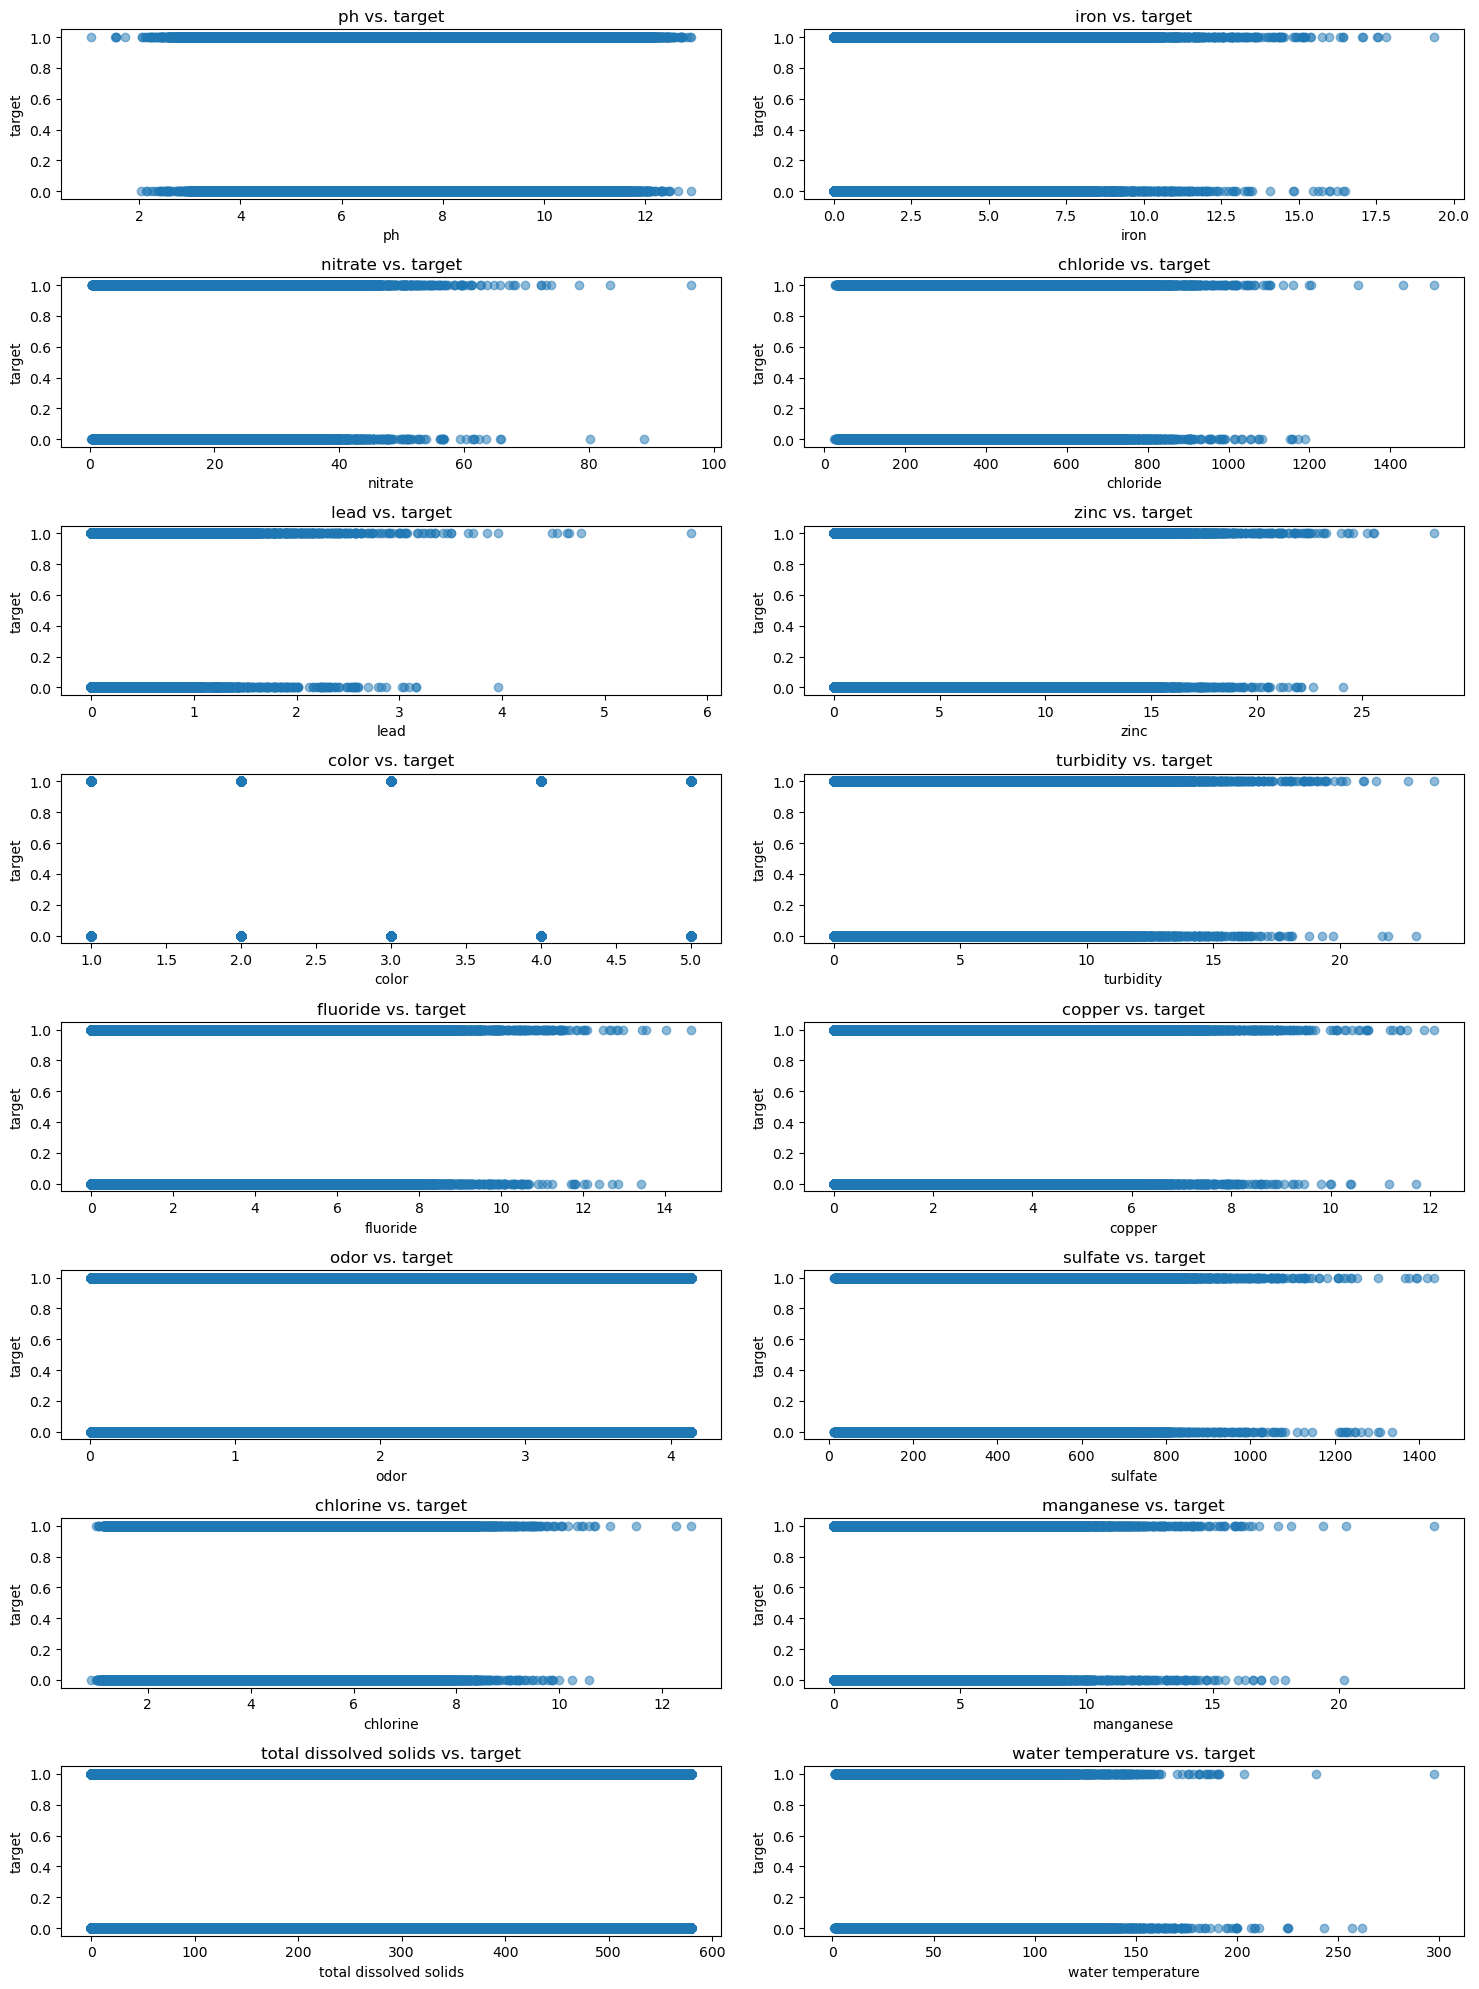

In [56]:
feature_columns = df.columns[:-1]
num_features = len(feature_columns)
num_rows = (num_features + 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))
axes = axes.flatten()
for i, feature_column in enumerate(feature_columns):
    if i < len(axes):  # 
        ax = axes[i]
        ax.scatter(df[feature_column], df[target_column], alpha=0.5)
        ax.set_xlabel(feature_column)
        ax.set_ylabel(target_column)
        ax.set_title(f'{feature_column} vs. {target_column}')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()
